<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Библиотеки" data-toc-modified-id="Библиотеки-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Библиотеки</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Тестовый-набор-данных" data-toc-modified-id="Тестовый-набор-данных-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Тестовый набор данных</a></span></li></ul></li><li><span><a href="#Проверка-наличия-дубликатов" data-toc-modified-id="Проверка-наличия-дубликатов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверка наличия дубликатов</a></span></li><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Работа с пропусками</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-сторонних-металлов-на-разных-этапах." data-toc-modified-id="Концентрация-сторонних-металлов-на-разных-этапах.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Концентрация сторонних металлов на разных этапах.</a></span></li><li><span><a href="#Проверка-размера-гранул-в-обучающей-и-тестовой-выборках" data-toc-modified-id="Проверка-размера-гранул-в-обучающей-и-тестовой-выборках-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проверка размера гранул в обучающей и тестовой выборках</a></span></li><li><span><a href="#Суммарные-концентрации-веществ-на-разных-стадиях-очистки" data-toc-modified-id="Суммарные-концентрации-веществ-на-разных-стадиях-очистки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Суммарные концентрации веществ на разных стадиях очистки</a></span></li><li><span><a href="#Удаление-аномальных-данных" data-toc-modified-id="Удаление-аномальных-данных-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Удаление аномальных данных</a></span></li><li><span><a href="#Анализ-остальных-фичей" data-toc-modified-id="Анализ-остальных-фичей-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Анализ остальных фичей</a></span><ul class="toc-item"><li><span><a href="#Зависимость-между-рекавери" data-toc-modified-id="Зависимость-между-рекавери-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Зависимость между рекавери</a></span></li><li><span><a href="#Флотация" data-toc-modified-id="Флотация-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Флотация</a></span><ul class="toc-item"><li><span><a href="#Параметры-сырья" data-toc-modified-id="Параметры-сырья-3.5.2.1"><span class="toc-item-num">3.5.2.1&nbsp;&nbsp;</span>Параметры сырья</a></span></li><li><span><a href="#Уровень-Рекавери" data-toc-modified-id="Уровень-Рекавери-3.5.2.2"><span class="toc-item-num">3.5.2.2&nbsp;&nbsp;</span>Уровень-Рекавери</a></span></li><li><span><a href="#Воздух-Рекавери" data-toc-modified-id="Воздух-Рекавери-3.5.2.3"><span class="toc-item-num">3.5.2.3&nbsp;&nbsp;</span>Воздух-Рекавери</a></span></li><li><span><a href="#Присадки-Рекавери" data-toc-modified-id="Присадки-Рекавери-3.5.2.4"><span class="toc-item-num">3.5.2.4&nbsp;&nbsp;</span>Присадки-Рекавери</a></span></li></ul></li><li><span><a href="#Первичная-очистка" data-toc-modified-id="Первичная-очистка-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Первичная очистка</a></span><ul class="toc-item"><li><span><a href="#Уровень-Рекавери" data-toc-modified-id="Уровень-Рекавери-3.5.3.1"><span class="toc-item-num">3.5.3.1&nbsp;&nbsp;</span>Уровень-Рекавери</a></span></li><li><span><a href="#Воздух-Рекавери" data-toc-modified-id="Воздух-Рекавери-3.5.3.2"><span class="toc-item-num">3.5.3.2&nbsp;&nbsp;</span>Воздух-Рекавери</a></span></li><li><span><a href="#Присадки-Рекавери" data-toc-modified-id="Присадки-Рекавери-3.5.3.3"><span class="toc-item-num">3.5.3.3&nbsp;&nbsp;</span>Присадки-Рекавери</a></span></li></ul></li><li><span><a href="#Вторичная-очистка" data-toc-modified-id="Вторичная-очистка-3.5.4"><span class="toc-item-num">3.5.4&nbsp;&nbsp;</span>Вторичная очистка</a></span><ul class="toc-item"><li><span><a href="#Уровень-Рекавери" data-toc-modified-id="Уровень-Рекавери-3.5.4.1"><span class="toc-item-num">3.5.4.1&nbsp;&nbsp;</span>Уровень-Рекавери</a></span></li><li><span><a href="#Воздух-Рекавери" data-toc-modified-id="Воздух-Рекавери-3.5.4.2"><span class="toc-item-num">3.5.4.2&nbsp;&nbsp;</span>Воздух-Рекавери</a></span></li></ul></li></ul></li><li><span><a href="#Подготовим-выборки-к-обучению" data-toc-modified-id="Подготовим-выборки-к-обучению-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Подготовим выборки к обучению</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-расчета-sMAPE" data-toc-modified-id="Функция-для-расчета-sMAPE-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Функция для расчета sMAPE</a></span></li><li><span><a href="#Константаная-модель" data-toc-modified-id="Константаная-модель-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Константаная модель</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>LGBM</a></span></li><li><span><a href="#Определение-лучшей-модели" data-toc-modified-id="Определение-лучшей-модели-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Определение лучшей модели</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Восстановление золота из руды

**Задача:**
Подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.

Необходимо использовать данные с параметрами добычи и очистки. Разбивка на обучающую и тестовую выборки уже проведена. 

Целевым признаком является эффективность обогащения - rescovery

$$ Recovery = \dfrac{C*(F-T)}{F*(C-T)}*100\% $$
где

$ C $ - доля золота в концентрате после флотации/очистки;

$ F $ - доля золота в сырье/концентрате до флотации/очистки;

$ T $ - доля золота в отвальных хвостах после флотации/очистки.

Метрикой является sMAPE - Symmetric Mean Absolute Percentage Error

Рассчитывается по формуле:

$$ sMAPE = \dfrac{1}{N}\displaystyle\sum_{i=1}^{N} \dfrac{|y_i-\widehat{y}_i|}{(|y_i|+|\widehat{y}_i|)/2}*100\% $$

где

$ y_i $ - Значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество.

$ \widehat{y}_i $ - Значение предсказания для объекта с порядковым номером i, например, в тестовой выборке.

$ N $ - Количество объектов в выборке.

Необходимо спрогнозировать сразу две величины: recovery после флотации и финальное recovery

Итоговое sMAPE будет расчитываться так:

$$ sMAPE_{итог} = 25\% * sMAPE_{Rougher} + 75\% * sMAPE_{Final} $$

**Цель:**
Оптимизировтаь производство, чтобы не запускать предприятие с убыточными характеристиками.

**План:**

1. Подготовка данных;
2. Проанализировать данные;
3. Построить несколько моделей;
4. Выбрать и обучить лучшую модель;
5. Проверить лучшую модель на тестовой выборке

## Библиотеки

Загрузим все необходимые библиотеки

In [210]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

import numpy as np

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

from skopt import BayesSearchCV

from skopt.space import Real, Categorical, Integer

from catboost import CatBoostRegressor

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [211]:
RANDOM_STATE=12345
N_ITER = 10
CV = 10
MAX_DEPTH = 10
MAX_N_ESTIMATORS = 500
MAX_MIN_SAMPLE_LEAF = 10
MAX_MIN_DATA_IN_LEAF = 30
MAX_BAGGING_FRACTION = 0.99

## Подготовка данных

Загрузка данных

In [212]:
try:
    data_full = pd.read_csv('gold_recovery_full_new.csv')
    data_train = pd.read_csv('gold_recovery_train_new.csv')
    data_test = pd.read_csv('gold_recovery_test_new.csv')
except:
    data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')

Изучим полный датасет с исходными данными ```gold_recovery_full_new.csv```

In [213]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


87 фичей, видно, что кое-где есть пропуски.

По флотационной установке 11 данных по параметрам процесса нет. Есть данные по флотационным реагентам и какой-то расчетный параметр. Можно сделать вывод, что использовать данные по этой установке нет смысла.

Также можно обратить внимание на то, что данные с временем получения замера ```date``` имеют тип object.

Изучим пропуски

In [214]:
data_full.isna().sum() / 100

date                                                   0.00
final.output.concentrate_ag                            0.01
final.output.concentrate_pb                            0.01
final.output.concentrate_sol                           2.11
final.output.concentrate_au                            0.00
final.output.recovery                                  0.00
final.output.tail_ag                                   0.01
final.output.tail_pb                                   1.01
final.output.tail_sol                                  0.06
final.output.tail_au                                   0.00
primary_cleaner.input.sulfate                          0.24
primary_cleaner.input.depressant                       0.37
primary_cleaner.input.feed_size                        0.00
primary_cleaner.input.xanthate                         1.04
primary_cleaner.output.concentrate_ag                  0.00
primary_cleaner.output.concentrate_pb                  1.16
primary_cleaner.output.concentrate_sol  

Больше всего пропусков в признаке ```secondary_cleaner.output.tail_sol``` - более 17 процентов всех объектов не имеют этого признака. Остальные пропуски не превышают 5 % в своих столбцах.

Посмотрим на сами данные

In [215]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [216]:
data_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

Рассмотрим обучающую выборку.

In [217]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


Пропуски в обучающем наборе

In [218]:
data_train.isna().sum() / 100

date                                                   0.00
final.output.concentrate_ag                            0.01
final.output.concentrate_pb                            0.01
final.output.concentrate_sol                           2.11
final.output.concentrate_au                            0.00
final.output.recovery                                  0.00
final.output.tail_ag                                   0.00
final.output.tail_pb                                   1.00
final.output.tail_sol                                  0.05
final.output.tail_au                                   0.00
primary_cleaner.input.sulfate                          0.20
primary_cleaner.input.depressant                       0.32
primary_cleaner.input.feed_size                        0.00
primary_cleaner.input.xanthate                         1.00
primary_cleaner.output.concentrate_ag                  0.00
primary_cleaner.output.concentrate_pb                  0.86
primary_cleaner.output.concentrate_sol  

Картина аналогична общему набору: больше всего пропусков в признаке ```secondary_cleaner.output.tail_sol```, остальные пропуски не превышают 5 % в своих столбцах.

In [219]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

В обучающей выборке, как и в датасете с полным объемом данных есть 87 столбцов. Среди них есть очевидно признаки, которые до начала процесса очистки руды знать нельзя - например продукт после каждого из этапов очистки, хвосты после этих этапов. Все эти данные становятся известны уже в ходе процесса, и эти признаки для предсказательной модели использовать не получится.

Теперь изучим тестовую выборку - это именно те признаки, которые возможно получить до самого процесса очистки, соответственно и модель должна обучаться только на этих признаках.

#### Тестовый набор данных

In [220]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Пропуски в тестовом наборе

In [221]:
data_test.isna().sum() / 100

date                                          0.00
primary_cleaner.input.sulfate                 0.04
primary_cleaner.input.depressant              0.05
primary_cleaner.input.feed_size               0.00
primary_cleaner.input.xanthate                0.04
primary_cleaner.state.floatbank8_a_air        0.00
primary_cleaner.state.floatbank8_a_level      0.00
primary_cleaner.state.floatbank8_b_air        0.00
primary_cleaner.state.floatbank8_b_level      0.00
primary_cleaner.state.floatbank8_c_air        0.00
primary_cleaner.state.floatbank8_c_level      0.00
primary_cleaner.state.floatbank8_d_air        0.00
primary_cleaner.state.floatbank8_d_level      0.00
rougher.input.feed_ag                         0.00
rougher.input.feed_pb                         0.00
rougher.input.feed_rate                       0.03
rougher.input.feed_size                       0.01
rougher.input.feed_sol                        0.21
rougher.input.feed_au                         0.00
rougher.input.floatbank10_sulfa

In [222]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

В тестовой выборке у нас есть только 53 признака. Только эти признаки и нужны будут для обучения модели. Необходимо удалить все лишние признаки из обучающей выборки. Так же видно, что кое-где есть пропуски, как и в обучающей выборке. Но их совсем немного.

Сразу заметим, что в тестовом наборе нет признака ```secondary_cleaner.output.tail_sol``` с наибольшим числом пропусков. Это сразу снимает задачу заполнения этих пропусков

Расчитаем ```recovery``` для этапа флотации на обучающем наборе с помощью формулы и сравним его с данной фичей из набора.

In [223]:
rougher_output_recovery = ((data_train['rougher.output.concentrate_au'] * 
                            (data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au'])) / 
                           (data_train['rougher.input.feed_au'] * 
                            (data_train['rougher.output.concentrate_au'] - data_train['rougher.output.tail_au']))
                           ) * 100
mean_absolute_error = mae(data_train['rougher.output.recovery'], rougher_output_recovery)
mean_absolute_error

9.73512347450521e-15

MAE между расчтеным значением и значением в наборе практически отсутсвует. Но все же есть. Возможно это связано с системой хранения чисел в компьютерах или с округлением значений.

Обратим внимание на то, что у нас все еще остались данные о сырье для флотационной установки 11 на стадии флотации. Хотя видно, что параметров ```'air'``` и ```'level'``` для данной установки нет ни в одном из процессов очистки. Возможно эта установка не используется в текущем процессе, а значит этот признак можно удалить.

In [224]:
data_test = data_test.drop(['rougher.input.floatbank11_sulfate', 
                            'rougher.input.floatbank11_xanthate',], axis=1)

data_train = data_train.drop(['rougher.input.floatbank11_sulfate', 
                            'rougher.input.floatbank11_xanthate',], axis=1)

### Проверка наличия дубликатов

In [225]:
print(data_full.duplicated().sum())
print(data_full['date'].duplicated().sum())

0
0


ни полных дубликатов на задвоенных по времени замеров нет.

### Работа с пропусками

Так как пропусков немного, можно просто удалить строки с пропусками

In [226]:
data_train = data_train.dropna()
data_test = data_test.dropna()
data_full_clean = data_full.dropna().copy()

Больше пропусков нет.

## Анализ данных

### Концентрация сторонних металлов на разных этапах.

In [227]:
def plot_hist(ax, data, label, alpha, bins, density, rwidth):
    hist = ax.hist(data, label=label, alpha=alpha, bins=bins, density=density, rwidth=rwidth)
    return hist

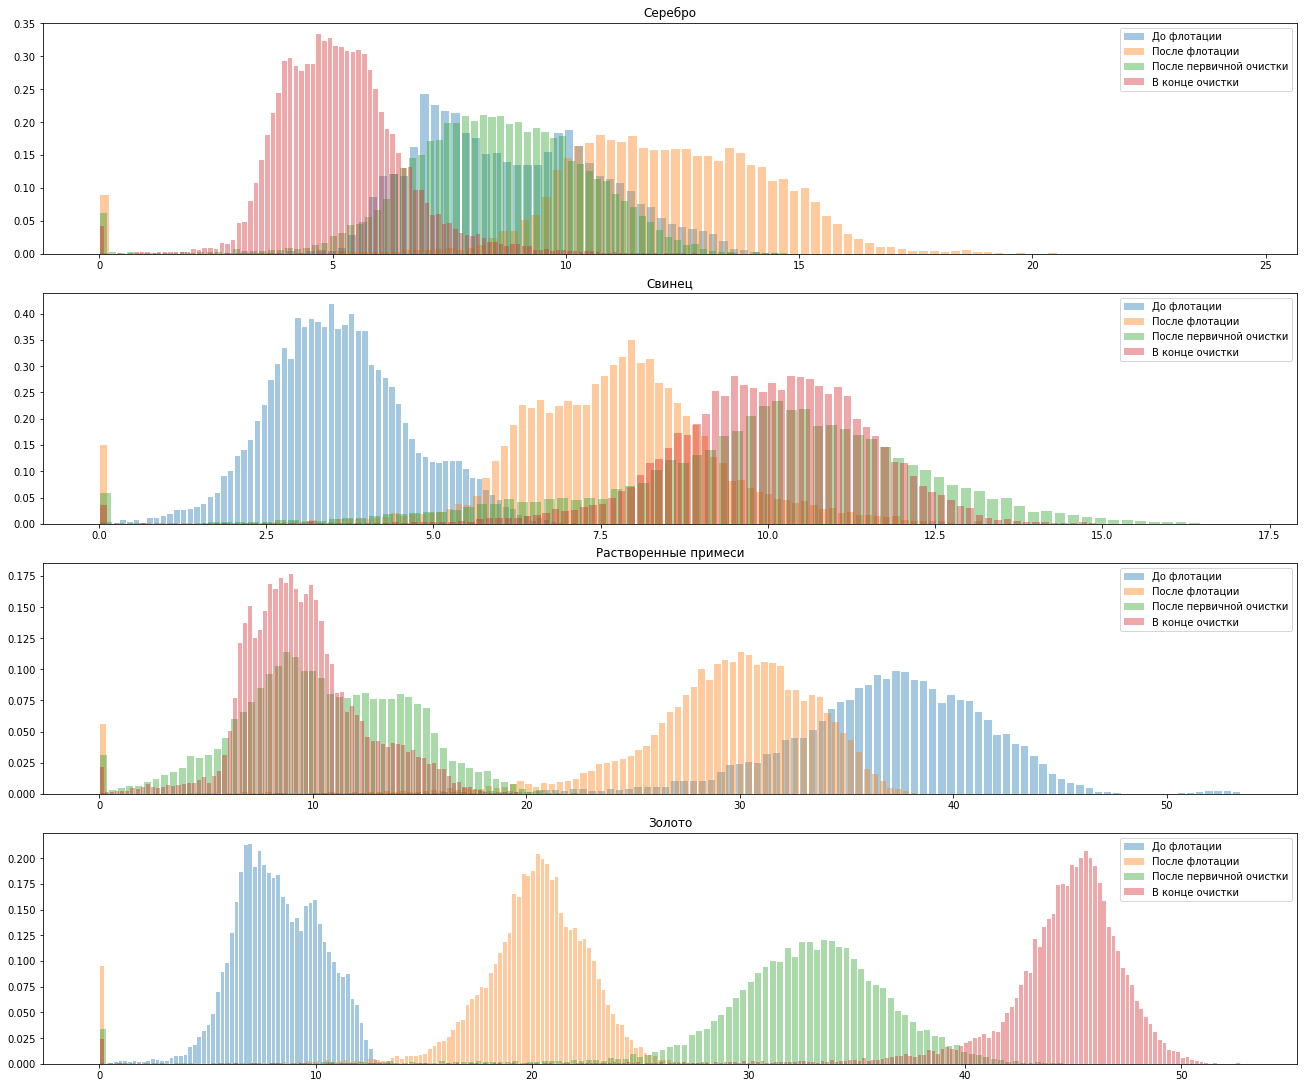

In [228]:
fig, ((ax0), (ax1), (ax2), (ax3)) = plt.subplots(nrows=4, ncols=1, figsize=(18, 15), layout='constrained')
components = ['ag', 'pb', 'sol', 'au']
plots = [ax0, ax1, ax2, ax3]
titles = ['Серебро', 'Свинец', 'Растворенные примеси', 'Золото']
hist_0 = 0
hist_1 = 0
hist_2 = 0
hist_3 = 0
hists = [hist_0, hist_1, hist_2, hist_3]
processes = ['rougher.input.feed_', 'rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_']
labels = ['До флотации', 'После флотации', 'После первичной очистки', 'В конце очистки']

i = 0
alpha = 0.4
bins = 'fd'
rwidth=0.8
density=True

for component in components:
    ax = plots[i]
    j = 0
    for hist in hists:
        hist = plot_hist(ax, data_full[processes[j]+component], label=labels[j], alpha=alpha, bins=bins, density=density, rwidth=rwidth)
        j += 1
    ax.legend(labels=labels)
    ax.set_title(titles[i])
    i += 1

i = 0
j = 0

Видно, что концентрация серебра возрастает после флотации, а далее от этапа к этапу концентрация серебра снижается. Судя по всему серебро удаляется именно на первичной и вторичной очистках, а на этапе флотации не затрагивается. 

Концентрация свинца возрастает после флотации и не сильно изменяется в процессе очистки.

Растворенные примеси удаляются из сырья по большей части при флотации и первичной очистке, при вторичной очистке растворенные примеси удаляются в незначительном объеме.

Как и ожидается от процесса обогащения золота, конуентрация золота возрастает от процесса к процессу.

Также для всех компонентов на всех этапах обогащения руды заметны выбросы около нуля

### Проверка размера гранул в обучающей и тестовой выборках

Изучим размер гранул сырья в обучающей и тестовой выборках с помощью нормализованных гистограмм.

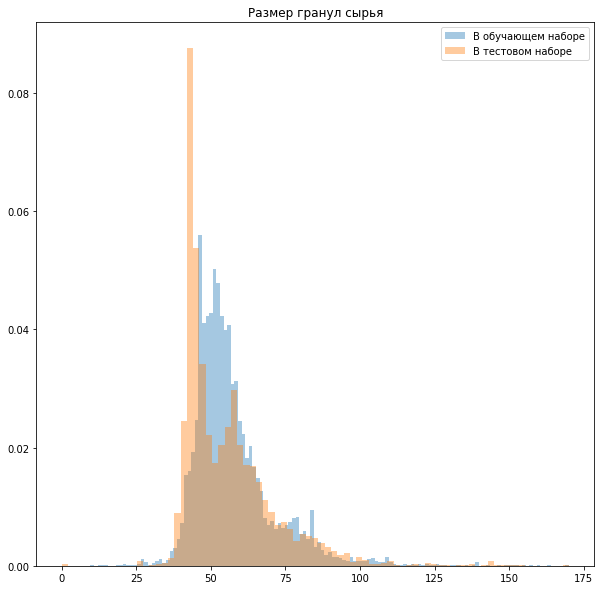

In [229]:
datasets = [data_train, data_test]
labels = ['В обучающем наборе', 'В тестовом наборе']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
i = 0

for dataset in datasets:
    ax.hist(dataset['rougher.input.feed_size'], 
            density=density, 
            bins=bins, 
            alpha=alpha, 
            range=(0, 170), 
            label=labels[i])
    i += 1
ax.legend(labels=labels)
ax.set_title('Размер гранул сырья')
plt.show()
i = 0

Можно сказать, что выборки сопоставимы

### Суммарные концентрации веществ на разных стадиях очистки 

C помощью гистограмм изучим суммарные концентрации веществ на разных стадиях

In [230]:
rougher_input_feed = ['rougher.input.feed_ag', 
                      'rougher.input.feed_au', 
                      'rougher.input.feed_pb', 
                      'rougher.input.feed_sol']

rougher_output_concentrate = ['rougher.output.concentrate_ag',
                              'rougher.output.concentrate_au',
                              'rougher.output.concentrate_pb',
                              'rougher.output.concentrate_sol']

final_output_concentrate = ['final.output.concentrate_ag', 
                            'final.output.concentrate_au', 
                            'final.output.concentrate_pb', 
                            'final.output.concentrate_sol']

concentrate_features_list = [rougher_input_feed, 
                             rougher_output_concentrate, 
                             final_output_concentrate]
total_conc = ['rougher.input.total_concentrate',
              'rougher.output.total_concentrate',
              'final.output.total_concentrate']

i = 0
for item in concentrate_features_list:
    data_full_clean[total_conc[i]] = data_full_clean[item].sum(axis=1)
    i += 1

In [231]:
data_full_clean = data_full_clean.set_index(data_full_clean['date'], drop=True)

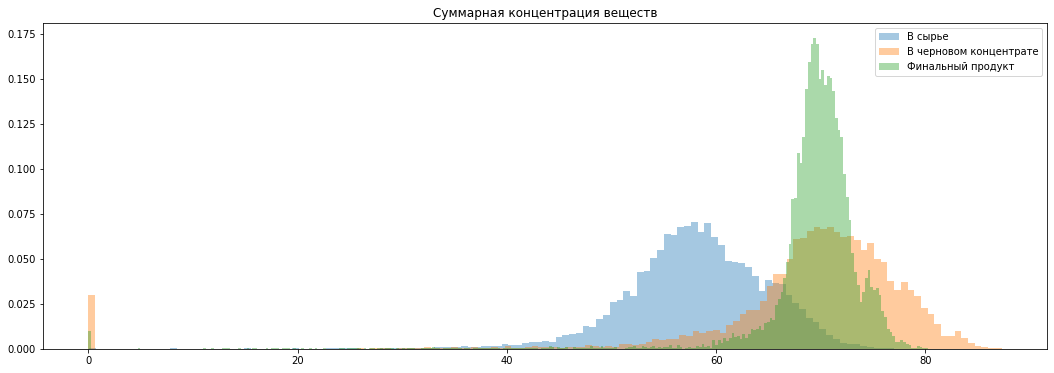

In [232]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))

labels = ['В сырье',
         'В черновом концентрате',
         'Финальный продукт']
i = 0

for conc in total_conc:
    ax.hist(data_full_clean[conc], 
            density=density, 
            bins=bins, 
            alpha=alpha, 
            label=labels[i])
    i += 1
ax.set_title('Суммарная концентрация веществ')
ax.legend(labels=labels)
plt.show()

i = 0

Видно, что в сырье суммарная крнцентрация веществ собрана в районе значений 55-65, после флотации (в черновом концентрате) суммарная концентрация сместилась к значениям 65-75, но все еще остается большой разброс в данных - встречаются случаи с суммарной концентрацией веществ, как и в сырье. Картина ощутимо менятеся для финального продукта - суммарный концентрации довольно кучно собраны в районе значения 70.

Из аномальных значений - заметно много знчений в районе 0. Это странные значения, лучше от таких строк избавиться. Как и в целом от редких значений, менее 40.

### Удаление аномальных данных

In [233]:
anomaly_index_final = list(data_full_clean.loc[data_full_clean['final.output.total_concentrate'] <= 40].index)
anomaly_index_r_output = list(data_full_clean.loc[data_full_clean['rougher.output.total_concentrate'] <= 40].index)
anomaly_index_r_input = list(data_full_clean.loc[data_full_clean['rougher.input.total_concentrate'] <= 40].index)
anomaly_index = []
anomaly_index.extend(anomaly_index_final)
anomaly_index.extend(anomaly_index_r_output)
anomaly_index.extend(anomaly_index_r_input)
data_full_clean = data_full_clean.loc[data_full_clean['final.output.total_concentrate'] > 40]
data_full_clean = data_full_clean.loc[data_full_clean['rougher.output.total_concentrate'] > 40]
data_full_clean = data_full_clean.loc[data_full_clean['rougher.input.total_concentrate'] > 40]

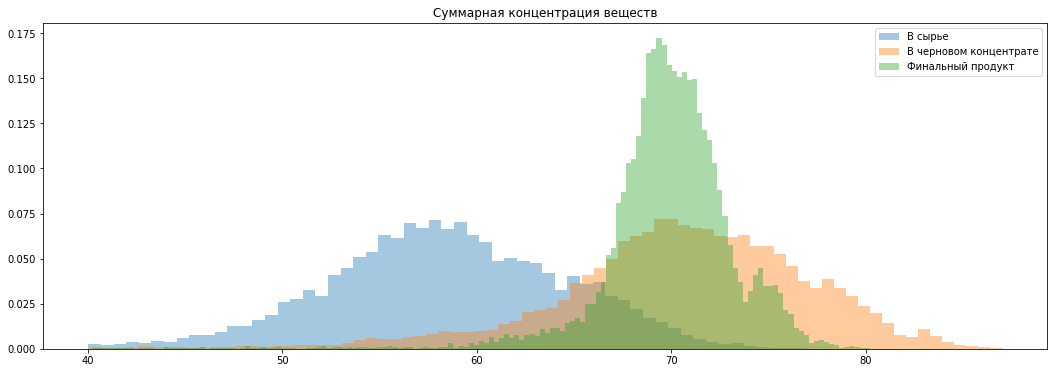

In [234]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))

i = 0

for conc in total_conc:
    ax.hist(data_full_clean[conc], 
            density=density, 
            bins=bins, 
            alpha=alpha, 
            label=labels[i])
    i += 1
ax.set_title('Суммарная концентрация веществ')
ax.legend(labels=labels)
plt.show()

i = 0

Тепеперь в данных нет измерений "пустого" сырья

### Анализ остальных фичей

In [235]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11341 entries, 0 to 14148
Data columns (total 85 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                11341 non-null  object 
 1   final.output.concentrate_ag                         11341 non-null  float64
 2   final.output.concentrate_pb                         11341 non-null  float64
 3   final.output.concentrate_sol                        11341 non-null  float64
 4   final.output.concentrate_au                         11341 non-null  float64
 5   final.output.recovery                               11341 non-null  float64
 6   final.output.tail_ag                                11341 non-null  float64
 7   final.output.tail_pb                                11341 non-null  float64
 8   final.output.tail_sol                               11341 non-null  float64


In [236]:
data_train['rougher.input.total_concentrate'] = data_train[rougher_input_feed].sum(axis=1)
data_test['rougher.input.total_concentrate'] = data_test[rougher_input_feed].sum(axis=1)

In [237]:
data_train['rougher.input.other_comp_concentrate'] = 100 - data_train['rougher.input.total_concentrate']
data_test['rougher.input.other_comp_concentrate'] = 100 - data_test['rougher.input.total_concentrate']

Оставим в обучающем наборе только необходимые признаки

In [238]:
data_train.shape

(11341, 87)

Удалим из обучающего набора все ненужные признаки и строки с аномальными значениями, которые мы определили на предыдущем этапе.

In [239]:
test_features_list = list(data_test.columns)
test_features_list.extend(['final.output.recovery', 'rougher.output.recovery'])  #запишем признаки из тестовой выборки и целевой признак (пока один)
train_features_list = list(data_train.columns)  #запишем все признаки из обучающей выборки


for feature in train_features_list:
    if feature not in test_features_list:                 #отбросим те признаки, которых нет в тестовой выборке,
        data_train = data_train.drop(feature, axis=1)     #за исключением целевого

data_train = data_train.set_index(data_train['date'])
data_train = data_train.drop(anomaly_index, errors='ignore')
data_train = data_train.reset_index(drop=True)
data_train = data_train.drop('date', axis=1)
data_train.shape

(10846, 54)

#### Зависимость между рекавери

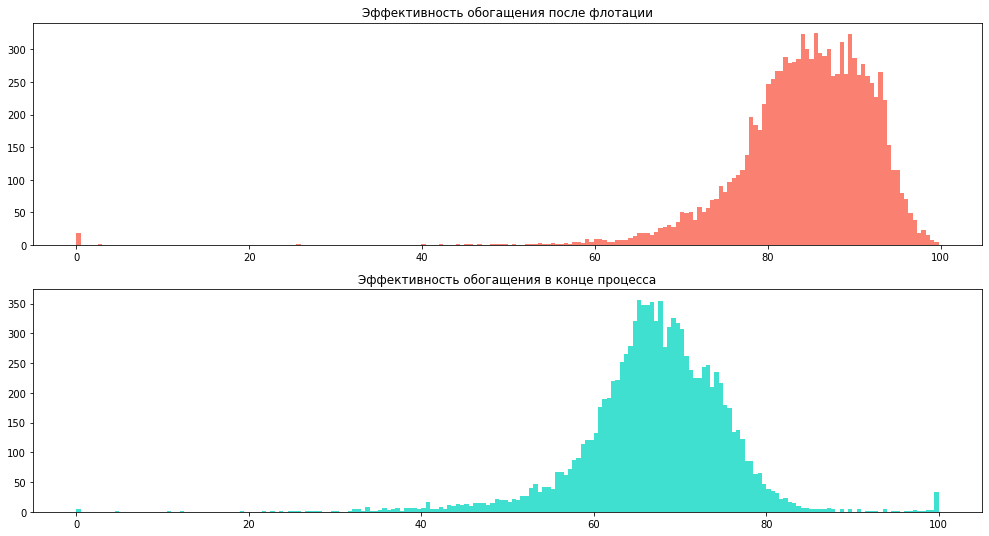

In [240]:
fig, ((ax0), (ax1)) = plt.subplots(nrows=2, ncols=1, figsize=(17, 9))
ax0.hist(data_train['rougher.output.recovery'], bins=200, color='salmon')
ax1.hist(data_train['final.output.recovery'], bins=200, color='turquoise')

ax0.set_title('Эффективность обогащения после флотации')
ax1.set_title('Эффективность обогащения в конце процесса')

plt.show()

Видно наличие редких и очевидно аномальных значений. Эффективность обогащения 100 -  выглядит очень странно, как и нулевые значения - скорее всего это замеры с ошибкой или при остановленном процессе.

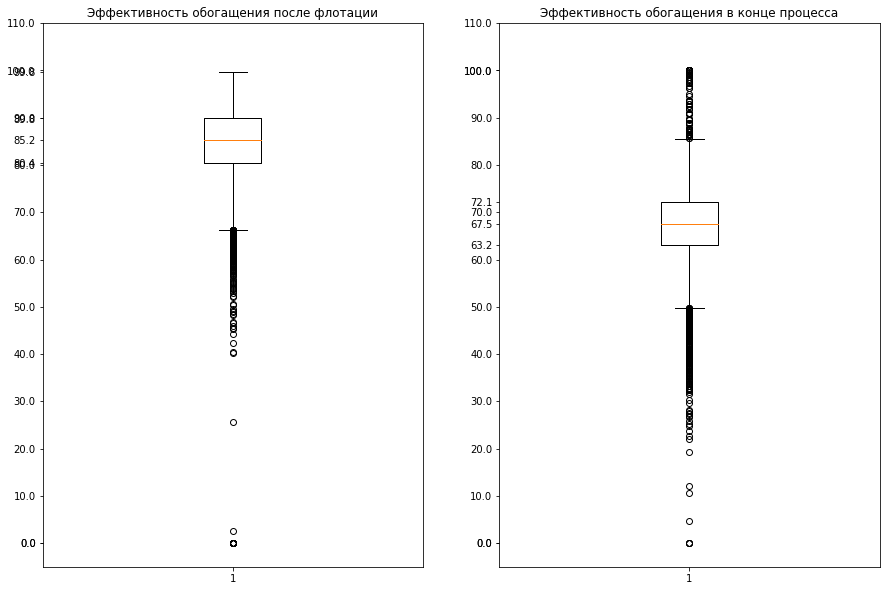

In [241]:
fig, ((ax0), (ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax0.boxplot(data_train['rougher.output.recovery'])
quantiles0 = list(np.quantile(data_train['rougher.output.recovery'], 
                         np.array([0.00, 0.25, 0.50, 0.75, 1.00])))
ax0.set_yticks(sorted(list(range(0, 120, 10)) + list(quantiles0)))
ax1.boxplot(data_train['final.output.recovery'])
quantiles1 = np.quantile(data_train['final.output.recovery'], 
                         np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
ax1.set_yticks(sorted(list(range(0, 120, 10)) + list(quantiles1)))

ax0.set_title('Эффективность обогащения после флотации')
ax1.set_title('Эффективность обогащения в конце процесса')

plt.show()

По ящику с усами пожно увидеть, что аномальные значения для эффективности обогащения после флотации находятся от 0 до 65 процентов, для финальной эффективности редкие значения есть как от 0 до 50 так и от 85 до 100 процентов.
Отбросим аномальные значения. Для эффективности после флотации примем за такие значения все, что ниже 60 процентов, для эффективности в конце отбросим строки со значениями менее 35 и более 90

In [242]:
data_train = data_train.loc[data_train['rougher.output.recovery'] >= 60]
data_train = data_train.loc[data_train['final.output.recovery'] <= 90]
data_train = data_train.loc[data_train['final.output.recovery'] >= 35]
data_train = data_train.reset_index(drop=True)

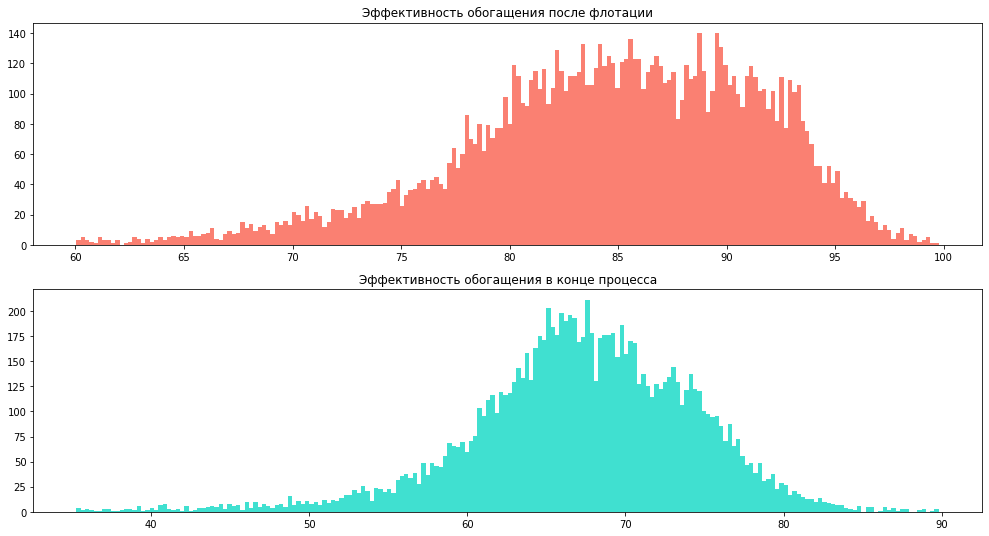

In [243]:
fig, ((ax0), (ax1)) = plt.subplots(nrows=2, ncols=1, figsize=(17, 9))
ax0.hist(data_train['rougher.output.recovery'], bins=200, color='salmon')
ax1.hist(data_train['final.output.recovery'], bins=200, color='turquoise')

ax0.set_title('Эффективность обогащения после флотации')
ax1.set_title('Эффективность обогащения в конце процесса')

plt.show()

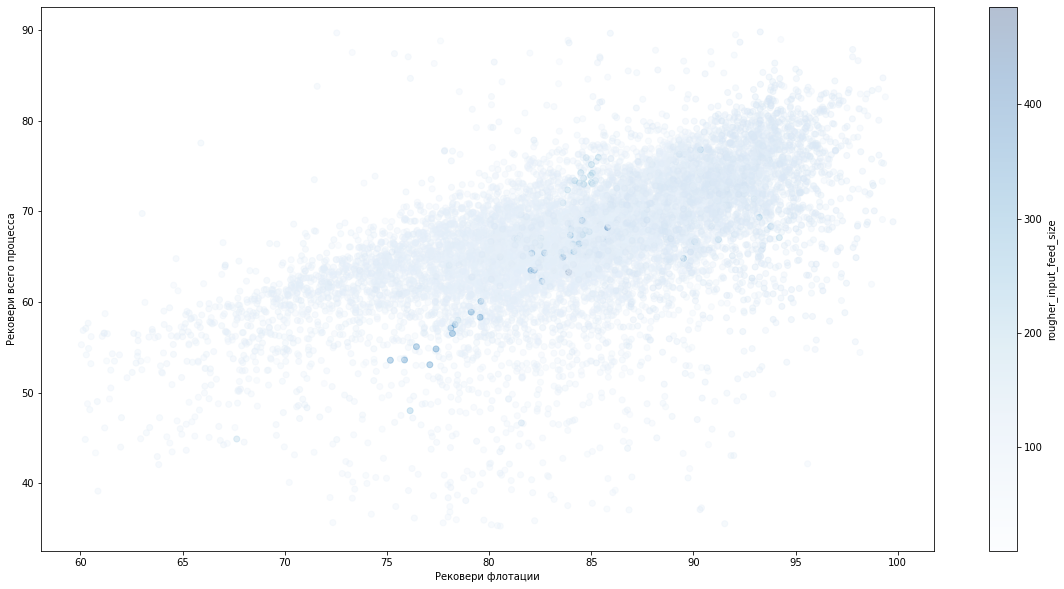

In [244]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 10))

scatter = ax.scatter(data=data_train, 
                     x='rougher.output.recovery', 
                     y='final.output.recovery',
                     c=data_train['rougher.input.feed_size'], cmap='Blues',
                     alpha=0.3)
ax.set_xlabel('Рековери флотации')
ax.set_ylabel('Рековери всего процесса')
fig.colorbar(scatter, ax=ax, label='rougher_input_feed_size')

plt.show()

Видно, что финальная эффективность и эффективность после флотации коррелируют между собой. Также заметна группа значений, у которых высокое значение размера зерен сырья перед флотацией.

#### Флотация

##### Параметры сырья

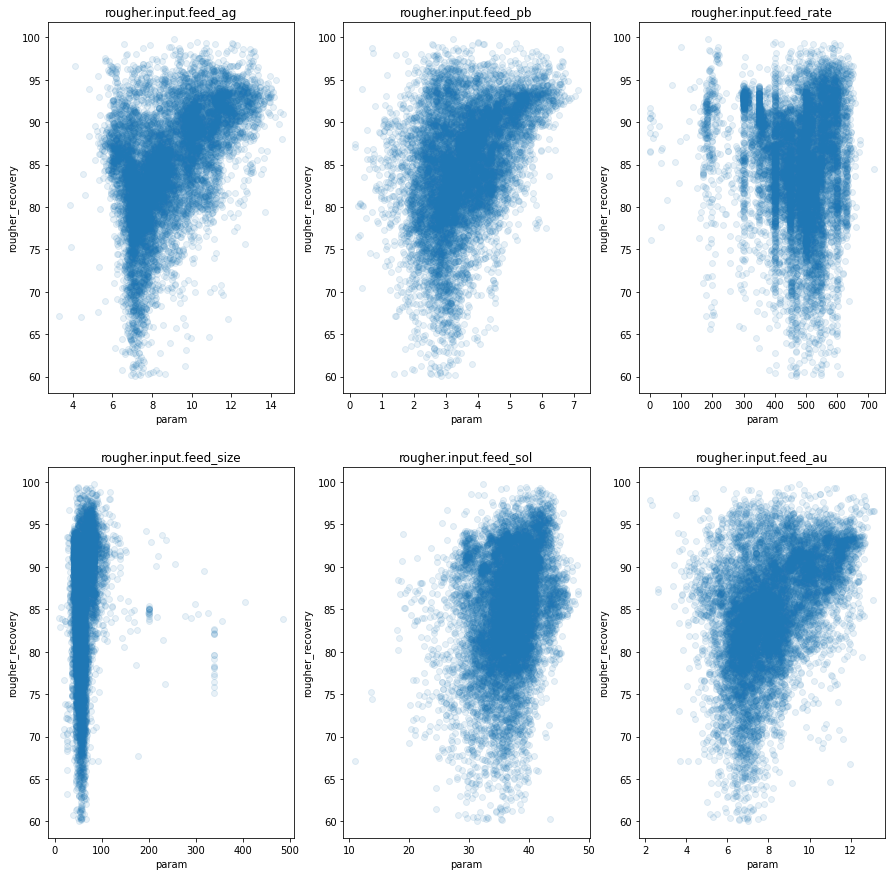

In [245]:
rougher_input_param = ['rougher.input.feed_ag',
                       'rougher.input.feed_pb',
                       'rougher.input.feed_rate',
                       'rougher.input.feed_size',
                       'rougher.input.feed_sol',
                       'rougher.input.feed_au']

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

plots = [ax0, ax1, ax2, ax3, ax4, ax5]

for i in range(len(plots)):
    scatter = plots[i].scatter(data=data_train, 
                               x=rougher_input_param[i], 
                               y='rougher.output.recovery',
                               alpha=0.1)
    plots[i].set_title(rougher_input_param[i])
    plots[i].set_xlabel('param')
    plots[i].set_ylabel('rougher_recovery')
plt.show()

Сразу видна группа объектов с высокими значениями размеров зерен перед флотацией, но с нормальными значениями эффективности. Это аномаьные значения, их не очень много, отбросим их.

In [246]:
data_train = data_train.loc[data_train['rougher.input.feed_size'] < 180]

##### Уровень-Рекавери

In [247]:
rougher_floatbank = ['floatbank10_a',
                     'floatbank10_b',
                     'floatbank10_c',
                     'floatbank10_d',
                     'floatbank10_e',
                     'floatbank10_f'
                    ]

rougher_air = ['rougher.state.floatbank10_a_air',
               'rougher.state.floatbank10_b_air',
               'rougher.state.floatbank10_c_air',
               'rougher.state.floatbank10_d_air',
               'rougher.state.floatbank10_e_air',
               'rougher.state.floatbank10_f_air']

rougher_level = ['rougher.state.floatbank10_a_level',
                 'rougher.state.floatbank10_b_level',
                 'rougher.state.floatbank10_c_level',
                 'rougher.state.floatbank10_d_level',
                 'rougher.state.floatbank10_e_level',
                 'rougher.state.floatbank10_f_level']

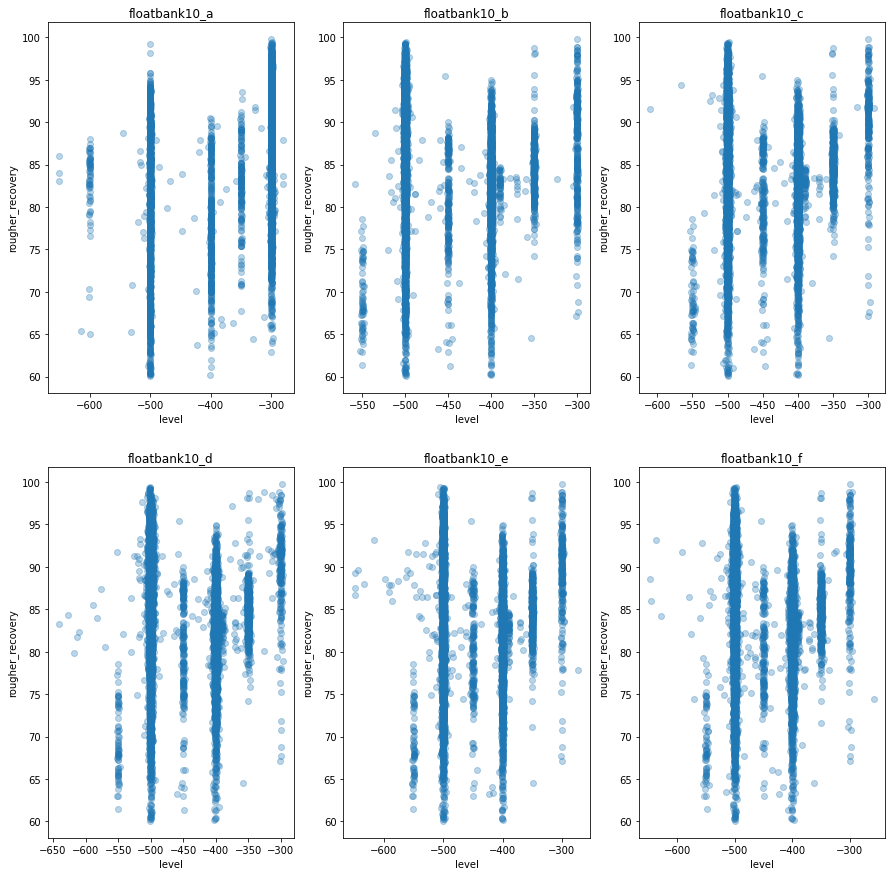

In [248]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

plots = [ax0, ax1, ax2, ax3, ax4, ax5]

for i in range(len(plots)):
    scatter = plots[i].scatter(data=data_train, 
                            x=rougher_level[i], 
                            y='rougher.output.recovery',
                            alpha=0.3)
    plots[i].set_title(rougher_floatbank[i])
    plots[i].set_xlabel('level')
    plots[i].set_ylabel('rougher_recovery')
plt.show()

Четки видны полосы соотвествующие четким значениям параметра ```level```. Явной зависимости эффективности процесса от значения параметра ```level``` не видно.

Видно, что значения уровня принимают преимуществнно ровные значения кратные 100: -600, -500, -400 и т.д.
Наиболее частым является значение -500

##### Воздух-Рекавери

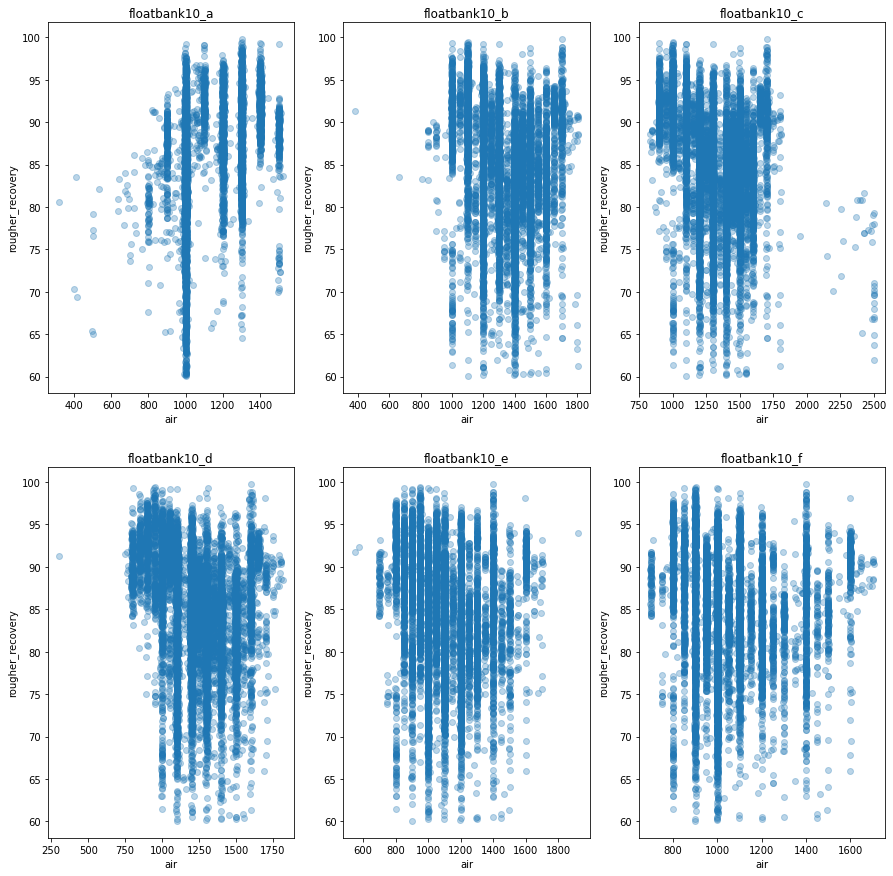

In [249]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

plots = [ax0, ax1, ax2, ax3, ax4, ax5]

for i in range(len(plots)):
    scatter = plots[i].scatter(data=data_train, 
                            x=rougher_air[i], 
                            y='rougher.output.recovery',
                            alpha=0.3)
    plots[i].set_title(rougher_floatbank[i])
    plots[i].set_xlabel('air')
    plots[i].set_ylabel('rougher_recovery')
plt.show()

С параметром ```air``` аналогичная ситуация, разве что набор значений, которые принимает этот параметр более обширный. Заметна группа выбивающихся значений в установке 10_c. Они не только выбиваются от значений на данной установке но и от других установок в этом процессе. Удалим эти странные значения.

In [250]:
data_train = data_train.loc[data_train['rougher.state.floatbank10_c_air'] < 2000]

##### Присадки-Рекавери

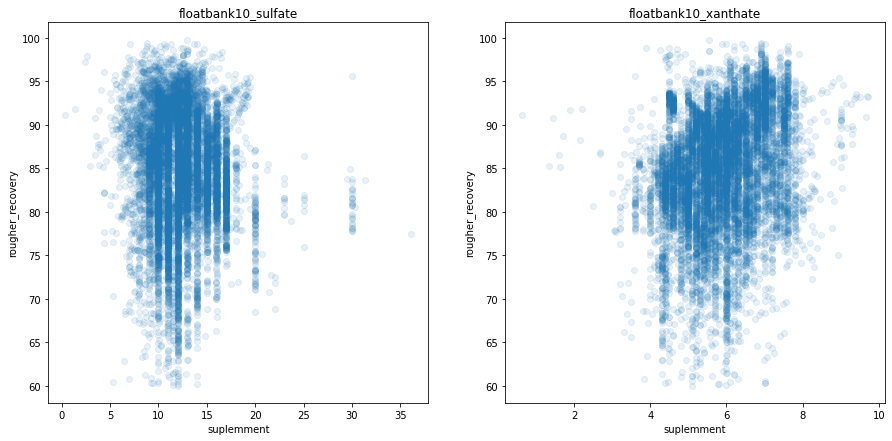

In [251]:
fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))
plots = [ax0, ax1]

rougher_supplements = ['rougher.input.floatbank10_sulfate', 
                       'rougher.input.floatbank10_xanthate']

titles = ['floatbank10_sulfate',
          'floatbank10_xanthate']

for i in range(len(plots)):
    scatter = plots[i].scatter(data=data_train, 
                               y='rougher.output.recovery', 
                               x=rougher_supplements[i],
                               alpha=0.1)
    plots[i].set_title(titles[i])
    plots[i].set_xlabel('suplemment')
    plots[i].set_ylabel('rougher_recovery')
plt.show()

Видно, что есть определенные наиболее частые значения, четкой зависимости нет.

In [252]:
data_train = data_train.loc[data_train['rougher.input.floatbank10_sulfate'] < 28]

#### Первичная очистка

In [253]:
primary_cleaner_floatbank = ['floatbank8_a',
                             'floatbank8_b',
                             'floatbank8_c',
                             'floatbank8_d']

primary_cleaner_air = ['primary_cleaner.state.floatbank8_a_air',
                       'primary_cleaner.state.floatbank8_b_air',
                       'primary_cleaner.state.floatbank8_c_air',
                       'primary_cleaner.state.floatbank8_d_air',]

primary_cleaner_level = ['primary_cleaner.state.floatbank8_a_level',
                         'primary_cleaner.state.floatbank8_b_level',
                         'primary_cleaner.state.floatbank8_c_level',
                         'primary_cleaner.state.floatbank8_d_level',]

##### Уровень-Рекавери

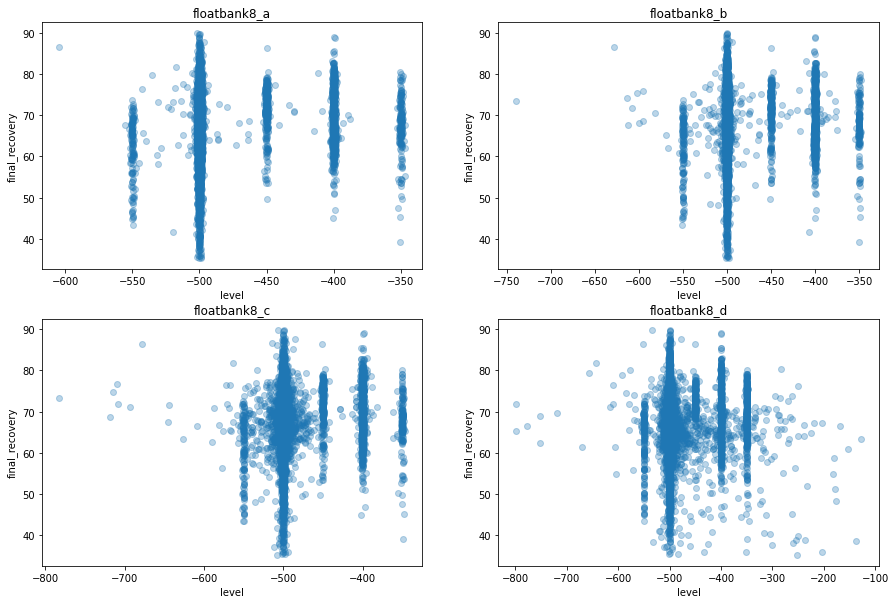

In [254]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

plots = [ax0, ax1, ax2, ax3]

for i in range(len(plots)):
    scatter = plots[i].scatter(data=data_train, 
                               x=primary_cleaner_level[i],
                               y='final.output.recovery', 
                               alpha=0.3)
    plots[i].set_title(primary_cleaner_floatbank[i])
    plots[i].set_xlabel('level')
    plots[i].set_ylabel('final_recovery')
plt.show()

```level``` при очистке тоже очень часто  имеет значение -500.

##### Воздух-Рекавери

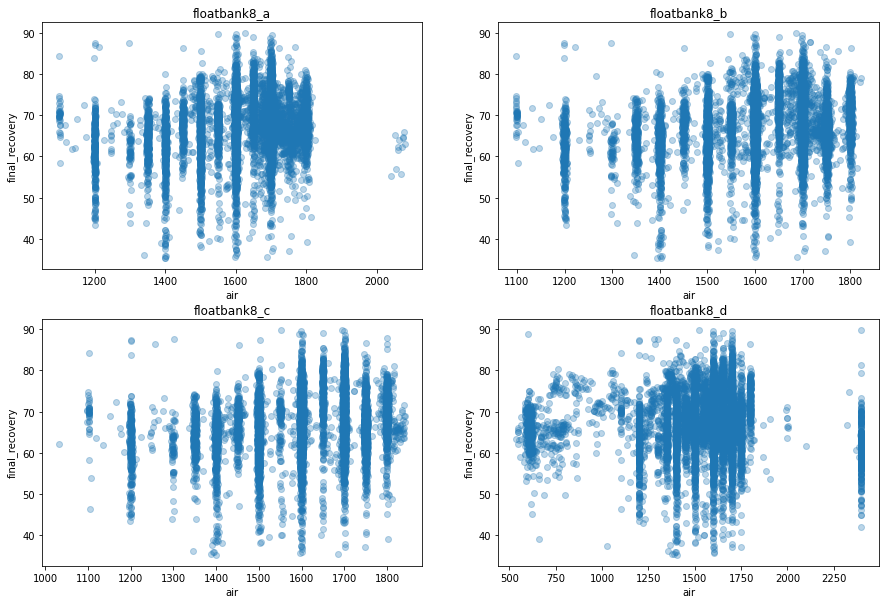

In [255]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

plots = [ax0, ax1, ax2, ax3]

for i in range(len(plots)):
    scatter = plots[i].scatter(data=data_train, 
                               x=primary_cleaner_air[i],
                               y='final.output.recovery', 
                               alpha=0.3)
    plots[i].set_title(primary_cleaner_floatbank[i])
    plots[i].set_xlabel('air')
    plots[i].set_ylabel('final_recovery')
plt.show()

Можно заметить две выделяющиеся группы точек на установке 8_a и 8_d. Они явно отстоят от общей массы точек. Если для утсновки 8_a их немного, то для утсановки 8_b таких точек сильно больше, проверим сколько таких объектов.

In [256]:
print(data_train.loc[data_train['primary_cleaner.state.floatbank8_d_air'] > 2000].shape[0] / data_train.shape[0])

0.02427000379218809


Совсем немного таких странных значений. Возможно это просто датчик раскалибровался, но эти значения явно выбиваются из общей массы. Отбросим выбивающиеся группы точек на установке 8_a и 8_b

In [257]:
data_train = data_train.loc[data_train['primary_cleaner.state.floatbank8_a_air'] < 2000]
data_train = data_train.loc[data_train['primary_cleaner.state.floatbank8_d_air'] < 2000]

##### Присадки-Рекавери

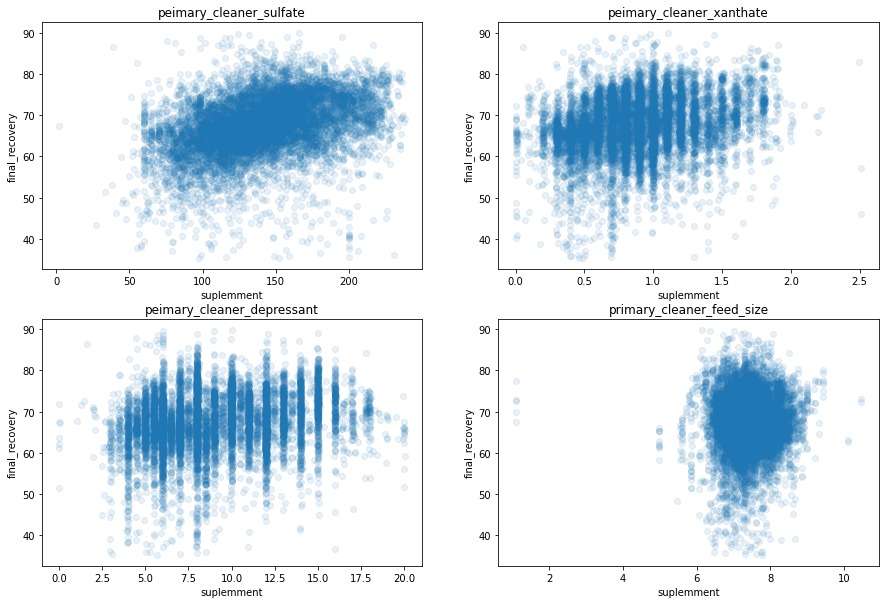

In [258]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
plots = [ax0, ax1, ax2, ax3]

primary_cleaner_supplements = ['primary_cleaner.input.sulfate',
                               'primary_cleaner.input.xanthate',
                               'primary_cleaner.input.depressant',
                               'primary_cleaner.input.feed_size']

titles = ['peimary_cleaner_sulfate',
          'peimary_cleaner_xanthate',
          'peimary_cleaner_depressant',
          'primary_cleaner_feed_size']

for i in range(len(plots)):
    scatter = plots[i].scatter(data=data_train, 
                            y='final.output.recovery', 
                            x=primary_cleaner_supplements[i],
                            alpha=0.1)
    plots[i].set_title(titles[i])
    plots[i].set_xlabel('suplemment')
    plots[i].set_ylabel('final_recovery')
plt.show()

#### Вторичная очистка

##### Уровень-Рекавери

In [259]:
secondary_cleaner_floatbank = ['floatbank2_a',
                               'floatbank2_b',
                               'floatbank3_a',
                               'floatbank3_b',
                               'floatbank4_a',
                               'floatbank4_b',
                               'floatbank5_a',
                               'floatbank5_b',
                               'floatbank6_a']

secondary_cleaner_air = ['secondary_cleaner.state.floatbank2_a_air',
                         'secondary_cleaner.state.floatbank2_b_air',
                         'secondary_cleaner.state.floatbank3_a_air',
                         'secondary_cleaner.state.floatbank3_b_air',
                         'secondary_cleaner.state.floatbank4_a_air',
                         'secondary_cleaner.state.floatbank4_b_air',
                         'secondary_cleaner.state.floatbank5_a_air',
                         'secondary_cleaner.state.floatbank5_b_air',
                         'secondary_cleaner.state.floatbank6_a_air']

secondary_cleaner_level = ['secondary_cleaner.state.floatbank2_a_level',
                           'secondary_cleaner.state.floatbank2_b_level',
                           'secondary_cleaner.state.floatbank3_a_level',
                           'secondary_cleaner.state.floatbank3_b_level',
                           'secondary_cleaner.state.floatbank4_a_level',
                           'secondary_cleaner.state.floatbank4_b_level',
                           'secondary_cleaner.state.floatbank5_a_level',
                           'secondary_cleaner.state.floatbank5_b_level',
                           'secondary_cleaner.state.floatbank6_a_level']

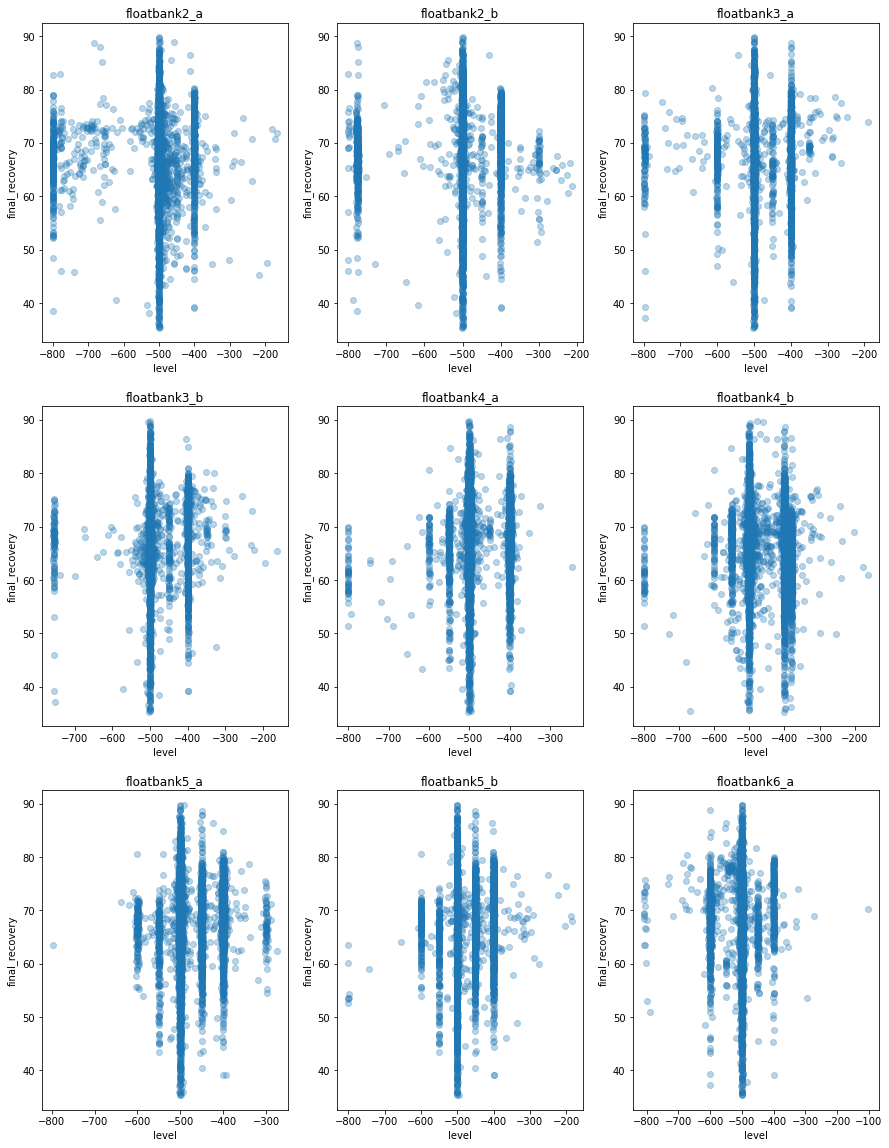

In [260]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8)) = plt.subplots(nrows=3, ncols=3, figsize=(15, 20))

plots = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

for i in range(len(plots)):
    scatter = plots[i].scatter(data=data_train, 
                     x=secondary_cleaner_level[i], 
                     y='final.output.recovery',
                     alpha=0.3)
    plots[i].set_title(secondary_cleaner_floatbank[i])
    plots[i].set_xlabel('level')
    plots[i].set_ylabel('final_recovery')
plt.show()

##### Воздух-Рекавери

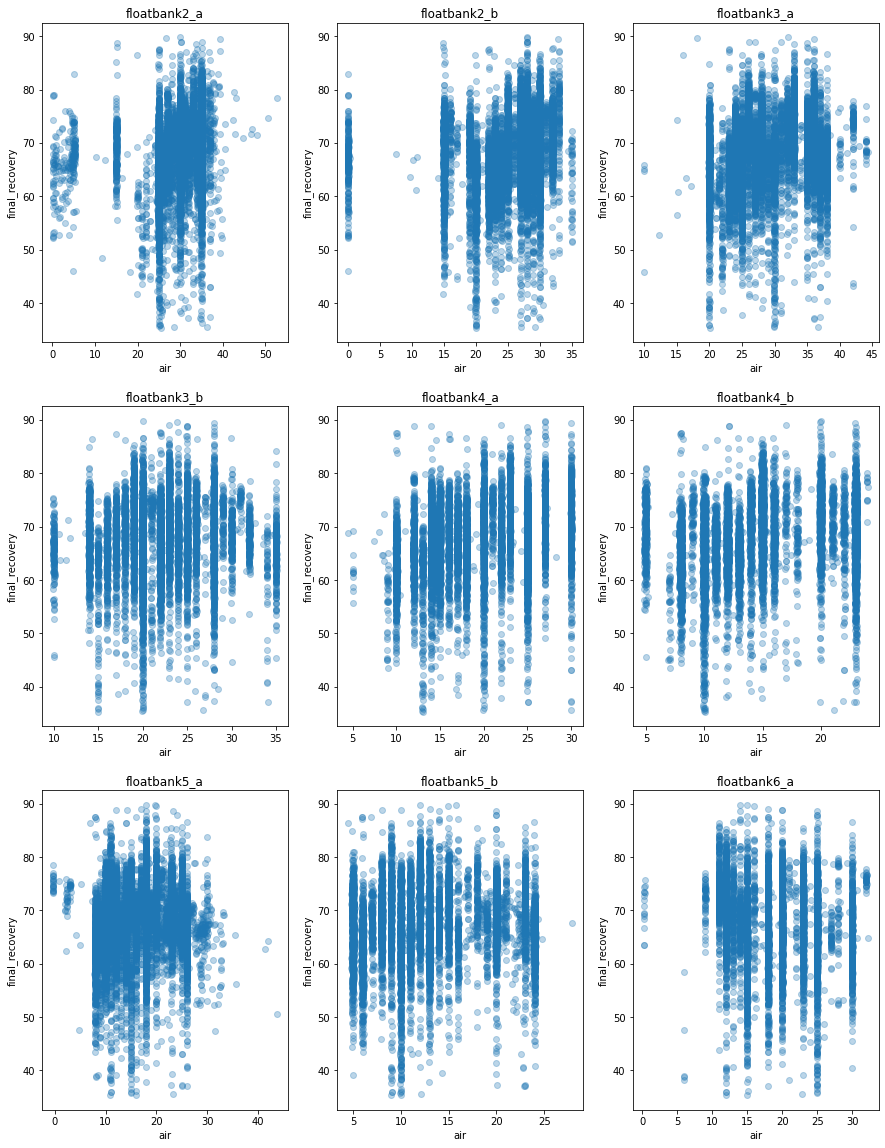

In [261]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8)) = plt.subplots(nrows=3, ncols=3, figsize=(15, 20))

plots = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

for i in range(len(plots)):
    scatter = plots[i].scatter(data=data_train, 
                     x=secondary_cleaner_air[i], 
                     y='final.output.recovery',
                     alpha=0.3)
    plots[i].set_title(secondary_cleaner_floatbank[i])
    plots[i].set_xlabel('air')
    plots[i].set_ylabel('final_recovery')
plt.show()

### Подготовим выборки к обучению

Необходимо разделить обучающий набор на набор признаков и целевой признак для флотации и для очистки. В итоге получится 4 набора, необходимых для обучения моделей. 2 - для флотации, 2 - для очистки.

In [262]:
data_train = data_train.sample(frac=1, random_state=RANDOM_STATE).reset_index(drop=True)

In [263]:
all_features_train = data_train.columns  #все необходимые признаки
rougher_data_train = data_train.copy()  #тут будут признаки для процесса флотации
cleaner_data_train = data_train.copy()  #тут будут признаки для остального процесса очистки
for feature in all_features_train:
    if 'roug' not in feature:
        rougher_data_train = rougher_data_train.drop(feature, axis=1)  #отбрасываем все признаки не отсносящиеся к флотации
    #if 'clean' not in feature and 'recov' not in feature:
        #cleaner_data_train = cleaner_data_train.drop(feature, axis=1)  #отбрасываем все признаки относящиеся к флотации за исключением recovery

features_train_rougher = rougher_data_train.drop(['rougher.output.recovery'], axis=1).copy()
target_train_rougher = rougher_data_train['rougher.output.recovery'].copy()
features_train_cleaner = cleaner_data_train.drop(['final.output.recovery'], axis=1).copy()
target_train_cleaner = cleaner_data_train['final.output.recovery'].copy()
print(features_train_rougher.shape, target_train_rougher.shape)
print(features_train_cleaner.shape, target_train_cleaner.shape)

(10280, 22) (10280,)
(10280, 53) (10280,)


Тестовый набор достался нам без целевого признака, необходимо его добавить. И удалить строки с аномальными значениями.

In [264]:
data_test.shape

(5250, 53)

In [265]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5250 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5250 non-null   object 
 1   primary_cleaner.input.sulfate               5250 non-null   float64
 2   primary_cleaner.input.depressant            5250 non-null   float64
 3   primary_cleaner.input.feed_size             5250 non-null   float64
 4   primary_cleaner.input.xanthate              5250 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5250 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5250 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5250 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5250 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5250 non-null   float64
 10  primary_clea

In [266]:
data_test = data_test.set_index(data_test['date'], drop=True)
data_test = data_test.join(data_full_clean['final.output.recovery'])
data_test = data_test.join(data_full_clean['rougher.output.recovery'])
data_test = data_test.reindex(columns=['date',
                                       'final.output.recovery', 
                                       'primary_cleaner.input.sulfate',
                                       'primary_cleaner.input.depressant',
                                       'primary_cleaner.input.feed_size',
                                       'primary_cleaner.input.xanthate', 
                                       'primary_cleaner.state.floatbank8_a_air',
                                       'primary_cleaner.state.floatbank8_a_level',
                                       'primary_cleaner.state.floatbank8_b_air', 
                                       'primary_cleaner.state.floatbank8_b_level',
                                       'primary_cleaner.state.floatbank8_c_air',
                                       'primary_cleaner.state.floatbank8_c_level',
                                       'primary_cleaner.state.floatbank8_d_air',
                                       'primary_cleaner.state.floatbank8_d_level',
                                       'rougher.input.feed_ag',
                                       'rougher.input.feed_pb',
                                       'rougher.input.feed_rate',
                                       'rougher.input.feed_size',
                                       'rougher.input.feed_sol',
                                       'rougher.input.feed_au',
                                       'rougher.input.floatbank10_sulfate',
                                       'rougher.input.floatbank10_xanthate',
                                       'rougher.output.recovery',
                                       'rougher.state.floatbank10_a_air',
                                       'rougher.state.floatbank10_a_level',
                                       'rougher.state.floatbank10_b_air',
                                       'rougher.state.floatbank10_b_level',
                                       'rougher.state.floatbank10_c_air',
                                       'rougher.state.floatbank10_c_level',
                                       'rougher.state.floatbank10_d_air',
                                       'rougher.state.floatbank10_d_level',
                                       'rougher.state.floatbank10_e_air',
                                       'rougher.state.floatbank10_e_level',
                                       'rougher.state.floatbank10_f_air',
                                       'rougher.state.floatbank10_f_level',
                                       'secondary_cleaner.state.floatbank2_a_air',
                                       'secondary_cleaner.state.floatbank2_a_level',
                                       'secondary_cleaner.state.floatbank2_b_air',
                                       'secondary_cleaner.state.floatbank2_b_level',
                                       'secondary_cleaner.state.floatbank3_a_air',
                                       'secondary_cleaner.state.floatbank3_a_level',
                                       'secondary_cleaner.state.floatbank3_b_air',
                                       'secondary_cleaner.state.floatbank3_b_level',
                                       'secondary_cleaner.state.floatbank4_a_air',
                                       'secondary_cleaner.state.floatbank4_a_level',
                                       'secondary_cleaner.state.floatbank4_b_air',
                                       'secondary_cleaner.state.floatbank4_b_level',
                                       'secondary_cleaner.state.floatbank5_a_air',
                                       'secondary_cleaner.state.floatbank5_a_level',
                                       'secondary_cleaner.state.floatbank5_b_air',
                                       'secondary_cleaner.state.floatbank5_b_level',
                                       'secondary_cleaner.state.floatbank6_a_air',
                                       'secondary_cleaner.state.floatbank6_a_level',
                                       'rougher.input.total_concentrate',
                                       'rougher.input.other_comp_concentrate'
                                      ])
data_test = data_test.reset_index(drop=True)
data_test= data_test.drop(['date'], axis=1)
data_test.shape

(5250, 54)

In [267]:
data_test.head()

,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.output.recovery,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.total_concentrate,rougher.input.other_comp_concentrate
0,70.273583,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,89.993421,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,72.871822,27.128178
1,68.910432,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,88.089657,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,71.669225,28.330775
2,68.143213,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,88.412756,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,73.202598,26.797402
3,67.776393,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,87.360133,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.7

In [268]:
data_test = data_test.sample(frac=1, random_state=RANDOM_STATE).reset_index(drop=True)

Точно также разделим тестовый набор на 2 набора для флотации (признаки и целевой признак) и 2 набора для очистки.

In [269]:
all_features_test = data_test.columns  #все необходимые признаки
rougher_data_test = data_test.copy()  #тут будут признаки для процесса флотации
cleaner_data_test = data_test.copy()  #тут будут признаки для остального процесса очистки
for feature in all_features_test:
    if 'roug' not in feature:
        rougher_data_test = rougher_data_test.drop(feature, axis=1)  #отбрасываем все признаки не отсносящиеся к флотации
    #if 'clean' not in feature and 'recov' not in feature:
        #cleaner_data_test = cleaner_data_test.drop(feature, axis=1)  #отбрасываем все признаки относящиеся к флотации за исключением recovery

features_test_rougher = rougher_data_test.drop(['rougher.output.recovery'], axis=1).copy()
target_test_rougher = rougher_data_test['rougher.output.recovery'].copy()
features_test_cleaner = cleaner_data_test.drop(['final.output.recovery'], axis=1).copy()
target_test_cleaner = cleaner_data_test['final.output.recovery'].copy()
print(features_test_rougher.shape, target_test_rougher.shape)
print(features_test_cleaner.shape, target_test_cleaner.shape)

(5250, 22) (5250,)
(5250, 53) (5250,)


## Модель

### Функция для расчета sMAPE

In [270]:
def sMAPE(target, predictions):
    predictions = pd.Series(predictions).reset_index(drop=True)
    target = pd.Series(target).reset_index(drop=True)
    step_1 = (target - predictions).abs()
    step_2 = (target.abs() + predictions.abs())/2
    smape = (step_1 / step_2).mean() * 100
    return smape

smape_score = make_scorer(sMAPE, greater_is_better=False)

def cv_smape(model, cv, features, target):
    cv_results = cross_val_score(model, 
                                 features, 
                                 target, 
                                 cv=cv, 
                                 scoring=smape_score,
                                 n_jobs=-1)
    smape = abs(sum(cv_results) / len(cv_results))
    return smape

In [271]:
def new_row(table, data, i):
    row_lin = pd.DataFrame(data=[data], columns=table.columns)
    table.loc[i, :] = row_lin.loc[0, :]
    display(table)
    i = i + 1
    return table, i

In [272]:
def best_models(features_train, target_train, model, params, random_state, n_iter, cv, scoring, verbose):
    clf_rougher = BayesSearchCV(model,
                                search_spaces=params,
                                random_state=random_state,
                                n_iter=n_iter,
                                cv=cv,
                                scoring=scoring,
                                verbose=verbose,
                                n_jobs=-1)
    clf_rougher_search = clf_rougher.fit(features_train, target_train)
    best_score = clf_rougher_search.best_score_
    best_params = clf_rougher_search.best_params_
    best_model = clf_rougher_search.best_estimator_
    print('Лучшие гипперпараметры: ', best_params)
    print('sMAPE:', best_score)
    return best_model, best_params, best_score

In [273]:
models = pd.DataFrame(columns=['name', 
                               'rougher_best_params',
                               'sMAPE_rougher', 
                               'cleaner_best_params',
                               'sMAPE_cleaner', 
                               'total_SMAPE'
                              ])
i = 0

### Константаная модель

Проверка адекватности на константной модели

In [274]:
predictions_rougher = pd.Series(target_train_rougher.mean(), index=target_test_rougher.index)
smape_rougher_const = sMAPE(target_test_rougher, predictions_rougher)

predictions_cleaner = pd.Series(target_train_cleaner.mean(), index=target_test_cleaner.index)
smape_cleaner_const = sMAPE(target_test_cleaner, predictions_cleaner)

smape_const = 0.25 * smape_rougher_const + 0.75 * smape_cleaner_const

print(smape_const)

6.817287679705066


In [275]:
models, i = new_row(models, 
                    ['const', 
                     None, 
                     smape_rougher_const, 
                     None, 
                     smape_cleaner_const, 
                     smape_const],
                   i)

,name,rougher_best_params,sMAPE_rougher,cleaner_best_params,sMAPE_cleaner,total_SMAPE
0,const,None,4.649444,None,7.539902,6.817288


Константная модель с предскзанием среднего значения для всех объектов показывает на **тестовом наборе данных** значение sMAPE в 6.85%.

### Линейная регрессия

In [276]:
transformer_rougher = Normalizer().fit(features_train_rougher)
features_train_rougher_norm = transformer_rougher.transform(features_train_rougher)

model_rougher_1 = LinearRegression()
smape_rougher_1 = cv_smape(model_rougher_1, CV, features_train_rougher_norm, target_train_rougher)

model_rougher_1.fit(features_train_rougher_norm, target_train_rougher)
features_train_cleaner['rougher.output.recovery'] = model_rougher_1.predict(features_train_rougher_norm)

transformer_cleaner = Normalizer().fit(features_train_cleaner)
features_train_cleaner_norm = transformer_cleaner.transform(features_train_cleaner)

model_cleaner_1 = LinearRegression()
model_cleaner_1.fit(features_train_cleaner_norm, target_train_cleaner)
smape_cleaner_1 = cv_smape(model_cleaner_1, CV, features_train_cleaner_norm, target_train_cleaner)
smape_1 = 0.25 * smape_rougher_1 + 0.75 * smape_cleaner_1
print(smape_1)

best_model_rougher_1 = model_rougher_1
best_model_cleaner_1 = model_cleaner_1

5.605760631586746


Линейная модель показала результат гораздо лучше.

In [277]:
models, i = new_row(models, 
                    ['lin', 
                     None, 
                     smape_rougher_1, 
                     None, 
                     smape_cleaner_1, 
                     smape_1],
                   i)

,name,rougher_best_params,sMAPE_rougher,cleaner_best_params,sMAPE_cleaner,total_SMAPE
0,const,None,4.649444,None,7.539902,6.817288
1,lin,None,4.190475,None,6.077522,5.605761


### Дерево решений

In [278]:
params_2 = {'max_depth' : Integer(1, MAX_DEPTH, 'log-uniform'),
            'criterion' : Categorical(['squared_error', 'absolute_error', 'friedman_mse', 'poisson']),
            'min_samples_leaf' : Integer(1, MAX_MIN_SAMPLE_LEAF, 'log-uniform')
           }
model_rougher_2 = DecisionTreeRegressor(random_state=RANDOM_STATE)
best_model_rougher_2, best_params_rougher_2, best_score_rougher_2 = best_models(features_train_rougher,
                                                                                target_train_rougher,
                                                                                model_rougher_2,
                                                                                params_2,
                                                                                RANDOM_STATE,
                                                                                N_ITER,
                                                                                CV,
                                                                                smape_score,
                                                                                20)
features_train_cleaner['rougher.output.recovery'] = best_model_rougher_2.predict(features_train_rougher)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Лучшие гипперпараметры:  OrderedDict([('criterion', 'friedman_mse'), ('max_depth', 10), ('min_samples_leaf', 4)])
sMAPE: -2.8734590629963863


In [279]:
model_cleaner_2 = DecisionTreeRegressor(random_state=RANDOM_STATE)
best_model_cleaner_2, best_params_cleaner_2, best_score_cleaner_2 = best_models(features_train_cleaner,
                                                                                 target_train_cleaner,
                                                                                 model_cleaner_2,
                                                                                 params_2,
                                                                                 RANDOM_STATE,
                                                                                 N_ITER,
                                                                                 CV,
                                                                                 smape_score,
                                                                                 20)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Лучшие гипперпараметры:  OrderedDict([('criterion', 'friedman_mse'), ('max_depth', 10), ('min_samples_leaf', 4)])
sMAPE: -5.360642493623287


In [280]:
smape_2 = abs(0.25 * best_score_rougher_2 + 0.75 * best_score_cleaner_2)

print(f'Итоговый sMAPE для модели дерева: {smape_2}')

Итоговый sMAPE для модели дерева: 4.738846635966561


In [281]:
models, i = new_row(models, 
                    ['tree', 
                     best_params_rougher_2, 
                     best_score_rougher_2, 
                     best_params_cleaner_2, 
                     best_score_cleaner_2, 
                     smape_2],
                   i)

,name,rougher_best_params,sMAPE_rougher,cleaner_best_params,sMAPE_cleaner,total_SMAPE
0,const,None,4.649444,None,7.539902,6.817288
1,lin,None,4.190475,None,6.077522,5.605761
2,tree,"{'criterion': 'friedman_mse', 'max_depth': 10,...",-2.873459,"{'criterion': 'friedman_mse', 'max_depth': 10,...",-5.360642,4.738847


### LGBM

In [282]:
model_rougher_3 = LGBMRegressor(random_state=RANDOM_STATE, 
                                n_jobs=-1, 
                                deterministic=True, 
                                bagging_freq=5,
                                extra_trees=True
                               )

params_3 = {'max_depth' : Integer(1, MAX_DEPTH, 'log-uniform'),
            'n_estimators' : Integer(50, MAX_N_ESTIMATORS, 'log-uniform'),
            'max_bin' : Integer(10, 200, 'log-uniform'),
            'feature_fraction_bynode' : Real(0.2, 1.0, 'log-uniform'),
            'bagging_fraction' : Real(0.01, MAX_BAGGING_FRACTION, 'log-uniform'),
            'min_data_in_leaf' : Integer(5, MAX_MIN_DATA_IN_LEAF, 'log-uniform')
           }

best_model_rougher_3, best_params_rougher_3, best_score_rougher_3 = best_models(features_train_rougher,
                                                                                target_train_rougher,
                                                                                model_rougher_3,
                                                                                params_3,
                                                                                RANDOM_STATE,
                                                                                N_ITER,
                                                                                CV,
                                                                                smape_score,
                                                                                20
                                                                               )

features_train_cleaner['rougher.output.recovery'] = best_model_rougher_3.predict(features_train_rougher)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] bagging_fraction is set=0.29509499812861867, subsample=1.0 will be ignored. Current value: bagging_fraction=0.29509499812861867
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Лучшие гипп

In [283]:
model_cleaner_3 = LGBMRegressor(random_state=RANDOM_STATE, 
                                n_jobs=-1, 
                                deterministic=True, 
                                bagging_freq=1,
                                extra_trees=True
                               )

best_model_cleaner_3, best_params_cleaner_3, best_score_cleaner_3 = best_models(features_train_cleaner,
                                                                                target_train_cleaner,
                                                                                model_cleaner_3,
                                                                                params_3,
                                                                                RANDOM_STATE,
                                                                                N_ITER,
                                                                                CV,
                                                                                smape_score,
                                                                                20)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] bagging_fraction is set=0.29509499812861867, subsample=1.0 will be ignored. Current value: bagging_fraction=0.29509499812861867
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Лучшие гипп

In [284]:
smape_3 = abs(0.25 * best_score_rougher_3 + 0.75 * best_score_cleaner_3)

print(f'Итоговый sMAPE для модели LGBM: {smape_3}')

Итоговый sMAPE для модели LGBM: 4.454062177451469


In [285]:
models, i = new_row(models, 
                    ['LGBM', 
                     best_params_rougher_3, 
                     best_score_rougher_3, 
                     best_params_cleaner_3, 
                     best_score_cleaner_3, 
                     smape_3],
                   i)

,name,rougher_best_params,sMAPE_rougher,cleaner_best_params,sMAPE_cleaner,total_SMAPE
0,const,None,4.649444,None,7.539902,6.817288
1,lin,None,4.190475,None,6.077522,5.605761
2,tree,"{'criterion': 'friedman_mse', 'max_depth': 10,...",-2.873459,"{'criterion': 'friedman_mse', 'max_depth': 10,...",-5.360642,4.738847
3,LGBM,"{'bagging_fraction': 0.29509499812861867, 'fea...",-2.900414,"{'bagging_fraction': 0.29509499812861867, 'fea...",-4.971945,4.454062


### Определение лучшей модели

Отсортируем модели по увеличение итогового sMAPE.

In [286]:
models.sort_values(by='total_SMAPE')

,name,rougher_best_params,sMAPE_rougher,cleaner_best_params,sMAPE_cleaner,total_SMAPE
3,LGBM,"{'bagging_fraction': 0.29509499812861867, 'fea...",-2.900414,"{'bagging_fraction': 0.29509499812861867, 'fea...",-4.971945,4.454062
2,tree,"{'criterion': 'friedman_mse', 'max_depth': 10,...",-2.873459,"{'criterion': 'friedman_mse', 'max_depth': 10,...",-5.360642,4.738847
1,lin,None,4.190475,None,6.077522,5.605761
0,const,None,4.649444,None,7.539902,6.817288


## Проверка модели на тестовой выборке

Проверим, какое sMAPE покажет лучшая модель на тестовом наборе данных.

In [287]:
best_model_rougher = best_model_rougher_3
best_model_cleaner = best_model_cleaner_3


smape_rougher = sMAPE(target_test_rougher, best_model_rougher.predict(features_test_rougher))

features_test_cleaner['rougher.output.recovery'] = best_model_rougher.predict(features_test_rougher)

smape_cleaner = sMAPE(target_test_cleaner, best_model_cleaner.predict(features_test_cleaner))

print(smape_rougher * 0.25 + smape_cleaner * 0.75)

5.7785635228857


В итоге на лучшей модели (LGBM) для тестовой модели была получена метрика sMAPE в 5.77, в то время как константная модель показывает значение 6.81.

## Общий вывод

1. В ходе проведенной работы были исследованы данные о процессе обогащения золотой руды.

2. В соответствии с этими данными можно сделать вывод, что серебро в ходе очистки удаляется, а вот концентрация свинца только возрастает, видимо от него сырье не очищается или очищается совсем назначительно. Тем не менее концентрация золота планомерно растет от этапа к этапу - как этого и требует процесс.
В данных имелись пропуски, вызванные вероятно ошибками при выгрузке данных или сбоями при их сборе.
Имелись аномальные значения: на некоторых этапах суммарная концентрация веществ была равна 0, что довольно странно. От таких объектов пришлось избавиться. Также некоторые замеры параметров были явно выбивающимися из общей картины, такие измерения тоже были отброшены.
Концентрация золота, как и ожидалось, от процесса к процессу увеличивается,остальные примеси удаляются на разных этапах обогащения.

3. Предложенные обучающий и тестовый наборы можно применять для обучения и тестирования моделей, так как эти наборы сопоставимы.

4. Были обучены 3 регрессионные модели: линейная регрессия, дерево решений и LGBM, с помощью кроссвалидации найдены наилучшие параметры. Лучшей всего себя показала LGBM. Средняя sMAPE показала значение в 4.45 на обучающей выборке.

5. Проверка на тестовой выборке показало sMAPE в 5.77. Видно, что модель переобучилась, но при этом SMAPE на констаной модели равно 6.81, что показывает ощутимый прирост в метрике.